# Análise sobre Arquivo Kaggle - Suicídios

Este arquivo foi importado do site KAGGLE. Tem por objetivo um estudo sobre as taxas de suicídio com visão sócio-econômica por países, gênero, faixa de idade e PIB. 

Perguntas:

- O PIB per capita tem algum impacto na taxa de suicídios no Brasil? 
- A taxa de suicídio por faixa de idade está aumentando?

In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import pandas.io.sql as sqlio
import seaborn as sns
import psycopg2
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import io
import statsmodels.formula.api as smf
import geopandas as gpd

%matplotlib inline
%config InlineBackend.figure_formats=['svg']

In [2]:
df = pd.read_csv(r'C:\Users\Marcos\Documents\KAGGLE-desafios\Suicidios\Datasets\master.csv') #importando o arquivo

In [3]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [5]:
world.rename(columns={'iso_a3':'3digit_code'},inplace=True)

In [6]:
df_paises = pd.read_csv(r'C:\Users\Marcos\Documents\KAGGLE-desafios\Suicidios\Datasets\paises.csv', delimiter='|', encoding='latin1') #importando o arquivo

In [7]:
df_map =  pd.merge(df_paises, df, on='country', how='inner')

In [8]:
df_compl_map = df_map.groupby(['3digit_code']).sum().reset_index()

In [9]:
df_compl_map1 =  pd.merge(world, df_compl_map, on='3digit_code', how='inner')

In [10]:
df.rename(columns={'gdp_per_capita ($)':'gdp_per_capita'},inplace=True)
df.rename(columns={'gdp_for_year ($)':'gdp_for_year'},inplace=True)
df.rename(columns={'suicides/100k pop':'suicides_100k_pop'},inplace=True)

In [11]:
df['log_suicides_no'] = np.log1p(df['suicides_no'])

In [12]:
df.head()

,country,year,sex,age,suicides_no,population,suicides_100k_pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita,generation,log_suicides_no
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,3.091042
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,2.833213
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,2.708050
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,0.693147
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,2.302585


In [13]:
df.drop(['HDI for year'], axis=1).head(0)

,country,year,sex,age,suicides_no,population,suicides_100k_pop,country-year,gdp_for_year ($),gdp_per_capita,generation,log_suicides_no


In [14]:
df_paises = pd.read_csv(r'C:\Users\Marcos\Documents\KAGGLE-desafios\Suicidios\Datasets\paises.csv', delimiter='|', encoding='latin1') #importando o arquivo

In [15]:
df_compl = pd.merge(df, df_paises, on='country', how='inner')

In [16]:
df_compl.head()

,country,year,sex,age,suicides_no,population,suicides_100k_pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita,generation,log_suicides_no,city,continent,region,2digit_code,3digit_code,Unnamed: 6
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,3.091042,Tirana,Europa,East,AL,ALB,NaN
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,2.833213,Tirana,Europa,East,AL,ALB,NaN
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,2.708050,Tirana,Europa,East,AL,ALB,NaN
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,0.693147,Tirana,Europa,East,AL,ALB,NaN
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,2.302585,Tirana,Europa,East,AL,ALB,NaN


In [17]:
df_compl.drop(['city'], axis=1).head(0)
df_compl.drop(['HDI for year'], axis=1).head(0)

,country,year,sex,age,suicides_no,population,suicides_100k_pop,country-year,gdp_for_year ($),gdp_per_capita,generation,log_suicides_no,city,continent,region,2digit_code,3digit_code,Unnamed: 6


In [18]:
df_compl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26128 entries, 0 to 26127
Data columns (total 19 columns):
country               26128 non-null object
year                  26128 non-null int64
sex                   26128 non-null object
age                   26128 non-null object
suicides_no           26128 non-null int64
population            26128 non-null int64
suicides_100k_pop     26128 non-null float64
country-year          26128 non-null object
HDI for year          7944 non-null float64
 gdp_for_year ($)     26128 non-null object
gdp_per_capita        26128 non-null int64
generation            26128 non-null object
log_suicides_no       26128 non-null float64
city                  26128 non-null object
continent             26128 non-null object
region                26128 non-null object
2digit_code           26128 non-null object
3digit_code           26128 non-null object
Unnamed: 6            0 non-null float64
dtypes: float64(4), int64(4), object(11)
memory usage: 4.0+ 

In [19]:
america = df_compl[(df_compl['continent']=='America') & (df_compl['year']<2016)]
europa = df_compl[(df_compl['continent']=='Europa') & (df_compl['year']<2016)]
africa = df_compl[(df_compl['continent']=='Africa') & (df_compl['year']<2016)]
asia = df_compl[(df_compl['continent']=='Asia') & (df_compl['year']<2016)]
oceania = df_compl[(df_compl['continent']=='Oceania') & (df_compl['year']<2016)]

In [20]:
table = pd.pivot_table(america[america['year']<2016], values='suicides_no', index=['continent'],columns=['year'], fill_value=0,aggfunc='sum')
table

year,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
continent,,,,,,,,,,,,,,,,,,,,,
America,43203,45717,46040,45463,45420,46245,46576,48991,50769,51472,...,61105,62668,65451,67132,68597,70091,72308,72882,71287,72992


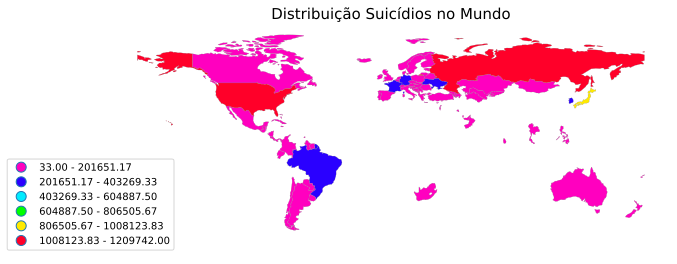

In [36]:
#Plotando novo DF com informação das coordenadas
ax = df_compl_map1.plot(column='suicides_no', 
                         cmap='gist_rainbow_r', 
                         figsize=(10, 8),
                         scheme='equal_interval',
                         linewidth=0.2, 
                         edgecolor='.5',
                         k=6,
                         legend=True)
ax.axis('off')
ax.get_legend().set_bbox_to_anchor((.12, .4))
ax.set_title("Distribuição Suicídios no Mundo", 
             fontdict={'fontsize': '15', 'fontweight' : '10'}, 
             loc='center');

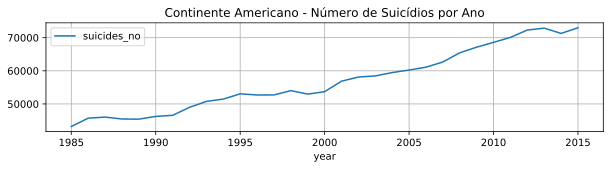

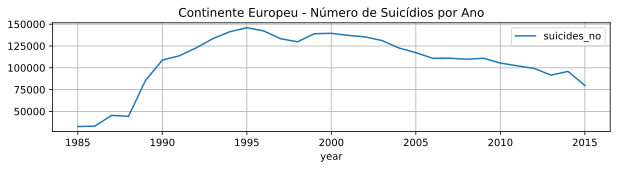

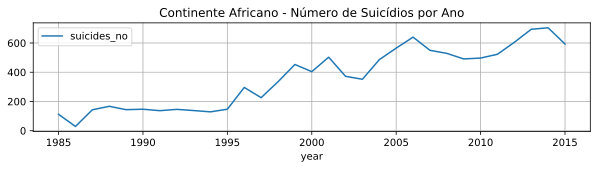

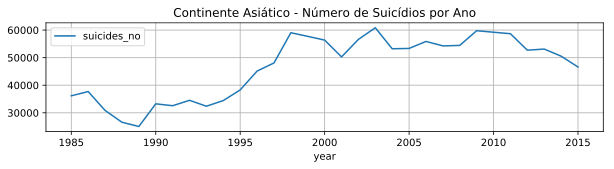

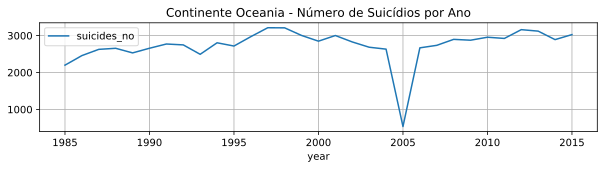

In [22]:
america_gr = america.groupby('year').sum()
europa_gr = europa.groupby('year').sum()
africa_gr = africa.groupby('year').sum()
asia_gr = asia.groupby('year').sum()
oceania_gr = oceania.groupby('year').sum()

america_gr[['suicides_no']].plot(figsize=(10, 2), title='Continente Americano - Número de Suicídios por Ano', grid=True) 
europa_gr[['suicides_no']].plot(figsize=(10, 2), title='Continente Europeu - Número de Suicídios por Ano', grid=True) 
africa_gr[['suicides_no']].plot(figsize=(10, 2), title='Continente Africano - Número de Suicídios por Ano', grid=True) 
asia_gr[['suicides_no']].plot(figsize=(10, 2), title='Continente Asiático - Número de Suicídios por Ano', grid=True) 
oceania_gr[['suicides_no']].plot(figsize=(10, 2), title='Continente Oceania - Número de Suicídios por Ano', grid=True) 


In [23]:
brazil = df_compl[(df_compl['country']=='Brazil') & (df_compl['year']<2016)]
brazil.drop(['city'], axis=1).head(0)
brazil.drop(['HDI for year'], axis=1).head(0)

,country,year,sex,age,suicides_no,population,suicides_100k_pop,country-year,gdp_for_year ($),gdp_per_capita,generation,log_suicides_no,city,continent,region,2digit_code,3digit_code,Unnamed: 6


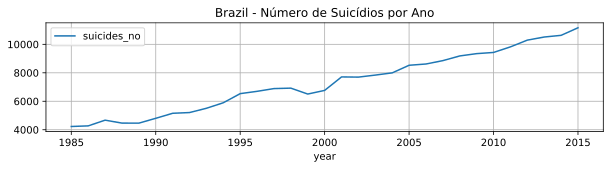

In [24]:
#
brazil_gr = brazil.groupby('year').sum()
brazil_gr[['suicides_no']].plot(figsize=(10, 2), title='Brazil - Número de Suicídios por Ano', grid=True) 

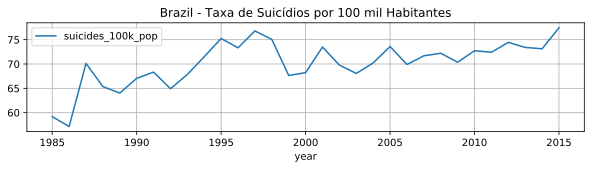

In [25]:
brazil_gr[['suicides_100k_pop']].plot(figsize=(10, 2), title='Brazil - Taxa de Suicídios por 100 mil Habitantes', grid=True) 

In [26]:
brazil_table = pd.pivot_table(brazil, values='suicides_no', index=['year'],columns=['age'], fill_value=0,aggfunc='sum')

In [27]:
pib_brazil = brazil.groupby(['gdp_per_capita','year']).size().reset_index()


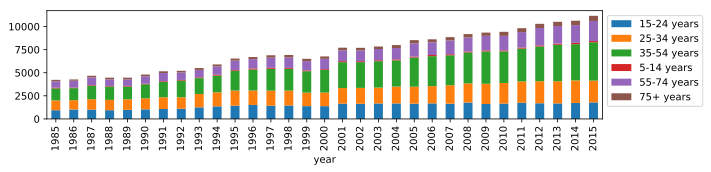

In [28]:
brazil_table.plot(figsize=(10,2),kind = "bar", stacked = True ).legend(bbox_to_anchor=(1.0, 1))

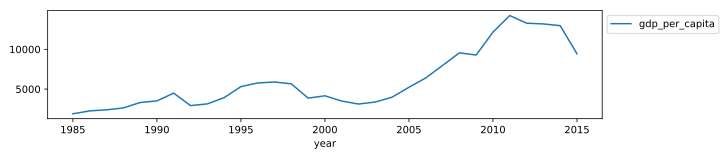

In [29]:
pib_brazil.sort_values(by=['year']).plot(figsize=(10,2), x='year', y='gdp_per_capita', kind = "line").legend(bbox_to_anchor=(1.0, 1))

In [30]:
brazil['suicides_no'].corr(brazil['gdp_per_capita'])

0.2274762871540463

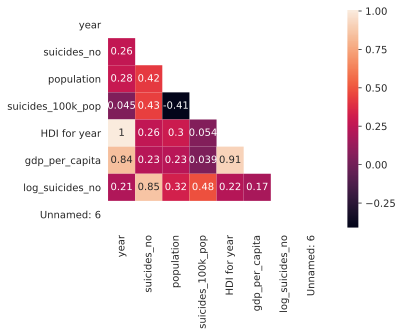

In [31]:
corr = brazil.corr()
mask = np.zeros_like(corr) # removendo valores zero
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(8,4));
    
    sns.heatmap(
        corr,
        ax=ax,
        annot=True,
        mask=mask,
        square=True
    );

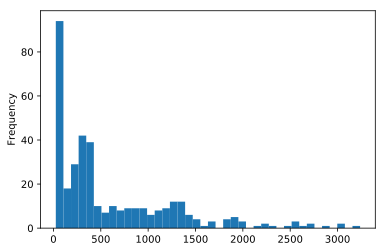

In [32]:
brazil.suicides_no.plot.hist(bins=40)

In [33]:
model = smf.ols('suicides_no ~ gdp_per_capita + sex + suicides_100k_pop', brazil).fit()
model.summary2()


<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
=====================================================================
Model:                OLS              Adj. R-squared:     0.338     
Dependent Variable:   suicides_no      AIC:                5728.2972 
Date:                 2019-05-08 13:46 BIC:                5743.9728 
No. Observations:     372              Log-Likelihood:     -2860.1   
Df Model:             3                F-statistic:        64.00     
Df Residuals:         368              Prob (F-statistic): 2.53e-33  
R-squared:            0.343            Scale:              2.8212e+05
---------------------------------------------------------------------
                   Coef.   Std.Err.    t    P>|t|    [0.025   0.975] 
---------------------------------------------------------------------
Intercept          -7.2209  60.8188 -0.1187 0.9056 -126.8168 112.3750
sex[T.male]       576.8854  73.6097  7.8371 0.0000  432.1370 721.6337
gdp_per_capita      0.0391   0.0074  5.2545 0.0000    0.0245   0.0537
suicides_100k_pop  15.3659   6.5582  2.3430 0.0197    2.4697  28.2620
---------------------------------------------------------------------
Omnibus:                39.505        Durbin-Watson:           1.206 
Prob(Omnibus):          0.000         Jarque-Bera (JB):        72.247
Skew:                   0.626         Prob(JB):                0.000 
Kurtosis:               4.759         Condition No.:           19809 
=====================================================================
* The condition number is large (2e+04). This might indicate
strong multicollinearity or other numerical problems.
"""

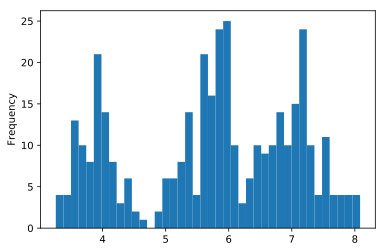

In [34]:
brazil.log_suicides_no.plot.hist(bins=40)